In [ ]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

Zad. 1

In [ ]:
data = pd.read_csv('GroceryStoreDataSet.csv', names=["products"])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
transactions = [transaction[0].split(',') for transaction in data.values]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,BISCUIT,BOURNVITA,BREAD,COCK,COFFEE,CORNFLAKES,JAM,MAGGI,MILK,SUGER,TEA
0,True,False,True,False,False,False,False,False,True,False,False
1,True,False,True,False,False,True,False,False,True,False,False
2,False,True,True,False,False,False,False,False,False,False,True
3,False,False,True,False,False,False,True,True,True,False,False
4,True,False,False,False,False,False,False,True,False,False,True
5,False,True,True,False,False,False,False,False,False,False,True
6,False,False,False,False,False,True,False,True,False,False,True
7,True,False,True,False,False,False,False,True,False,False,True
8,False,False,True,False,False,False,True,True,False,False,True
9,False,False,True,False,False,False,False,False,True,False,False


In [ ]:
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True, verbose=1)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
max_confidence_rule = rules.loc[rules['confidence'].idxmax()]
max_lift_rule = rules.loc[rules['lift'].idxmax()]

Processing 42 combinations | Sampling itemset size 3


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print("Rule with highest confidence:")
print(max_confidence_rule)
print("\nRule with highest lift:")
print(max_lift_rule)

Rule with highest confidence:
antecedents             (MILK)
consequents            (BREAD)
antecedent support        0.25
consequent support        0.65
support                    0.2
confidence                 0.8
lift                  1.230769
leverage                0.0375
conviction                1.75
zhangs_metric             0.25
Name: 0, dtype: object

Rule with highest lift:
antecedents            (MAGGI)
consequents              (TEA)
antecedent support        0.25
consequent support        0.35
support                    0.2
confidence                 0.8
lift                  2.285714
leverage                0.1125
conviction                3.25
zhangs_metric             0.75
Name: 4, dtype: object


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Zadanie - rekomendacje filmowe

In [ ]:
ratings = pd.read_csv('https://s3-us-west-2.amazonaws.com/recommender-tutorial/ratings.csv')
movies = pd.read_csv('https://s3-us-west-2.amazonaws.com/recommender-tutorial/movies.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
total_ratings = ratings.shape[0]
total_movies = movies['movieId'].nunique()
total_users = ratings['userId'].nunique()
avg_ratings_per_user = total_ratings / total_users
avg_ratings_per_movie = total_ratings / total_movies
ratings_distribution = ratings['rating'].value_counts().sort_index()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print("Liczba ocen:", total_ratings)
print("Liczba filmów:", total_movies)
print("Liczba użytkowników:", total_users)
print("Średnia liczba ocen na użytkownika:", avg_ratings_per_user)
print("Średnia liczba ocen na film:", avg_ratings_per_movie)
print("Ratings Distribution:\n", ratings_distribution)

Liczba ocen: 100836
Liczba filmów: 9742
Liczba użytkowników: 610
Średnia liczba ocen na użytkownika: 165.30491803278687
Średnia liczba ocen na film: 10.350646684459043
Ratings Distribution:
 rating
0.5     1370
1.0     2811
1.5     1791
2.0     7551
2.5     5550
3.0    20047
3.5    13136
4.0    26818
4.5     8551
5.0    13211
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


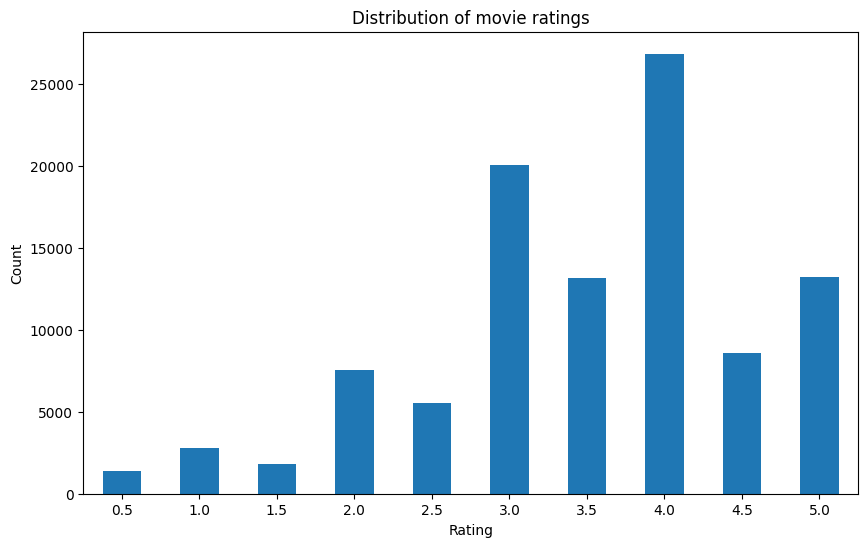

In [ ]:
plt.figure(figsize=(10, 6))
ratings_distribution.plot(kind='bar')
plt.title('Distribution of movie ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [ ]:
movie_titles = dict(zip(movies['movieId'], movies['title']))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
movie_stats = ratings.groupby('movieId').agg(count=('rating', 'size'), mean=('rating', 'mean')).reset_index()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
C = movie_stats['count'].mean()
m = movie_stats['mean'].mean()
print("C: ",C, ", m: ",m)

C:  10.369806663924312 , m:  3.262448274810963


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def bayesian_avg(ratings):
    bayesian_avg = (C * m + ratings.sum()) / (C + ratings.count())
    return bayesian_avg

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
bayesian_avg_ratings = ratings.groupby('movieId')['rating'].agg(bayesian_avg).reset_index()
bayesian_avg_ratings.columns = ['movieId', 'bayesian_avg']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
movie_stats = movie_stats.merge(bayesian_avg_ratings, on='movieId')
print(movie_stats.head())

   movieId  count      mean  bayesian_avg
0        1    215  3.920930      3.890632
1        2    110  3.431818      3.417227
2        3     52  3.259615      3.260086
3        4      7  2.357143      2.897612
4        5     49  3.071429      3.104793


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from scipy.sparse import csr_matrix
def create_sparse(df):
  M = df['userId'].nunique()
  N = df['movieId'].nunique()
  user_mapper = dict(zip(np.unique(df["userId"]), list(range(M))))
  movie_mapper = dict(zip(np.unique(df["movieId"]), list(range(N))))
  user_inv_mapper = dict(zip(list(range(M)), np.unique(df["userId"])))
  movie_inv_mapper = dict(zip(list(range(N)), np.unique(df["movieId"])))
  user_index = [user_mapper[i] for i in df['userId']]
  item_index = [movie_mapper[i] for i in df['movieId']]
  X = csr_matrix((df["rating"], (user_index, item_index)), shape=(M,N))
  return X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper = create_sparse(ratings)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def find_similar_movies(movie_id, X, movie_mapper, movie_inv_mapper, k, metric='cosine'):
    X = X.T
    neighbour_ids = []
    movie_ind = movie_mapper[movie_id]
    movie_vec = X[movie_ind]
    if isinstance(movie_vec, (np.ndarray)):
        movie_vec = movie_vec.reshape(1,-1)
    kNN = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric=metric)
    kNN.fit(X)
    neighbour = kNN.kneighbors(movie_vec, return_distance=False)
    for i in range(0,k):
        n = neighbour.item(i)
        neighbour_ids.append(movie_inv_mapper[n])
    neighbour_ids.pop(0)
    return neighbour_ids

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
n_total = X.shape[0]*X.shape[1]
n_ratings = X.nnz #scipy.sparse.csr_matrix.nnz no of stored values, including explicit 0
sparsity = n_ratings/n_total
sparsity_p = round(sparsity*100,2)
print(f"Matrix sparsity: {sparsity_p}%")
n_ratings_per_user = X.getnnz(axis=1)
n_ratings_per_user = X.getnnz(axis=1)
print("Amount of ratings per user:", n_ratings_per_user)

Matrix sparsity: 1.7%
Amount of ratings per user: [ 232   29   39  216   44  314  152   47   46  140   64   32   31   48
  135   98  105  502  703  242  443  119  121  110   26   21  135  570
   81   34   50  102  156   86   23   60   21   78  100  103  217  440
  114   48  399   42  140   33   21  310  359  130   20   33   25   46
  476  112  107   22   39  366  271  517   34  345   36 1260   46   62
   35   45  210  177   69  119   29   61   64  167   26  227  118  293
   34   70   21   56  518   54  575   24   97   56  168   78   36   92
   53  148   61   56  377  273  722   33   34   76  127   51  646   65
  150   31  112   87  165   22  215   22   58  292   56   50  360   38
   22   33  140   28   69  347   35   35  279  111  141   22  194  608
  168   38   71  128   23   32   20   48   58   26   59   63  179   34
   46  398   21   26   97  437   39   38   23   36   65  190  173   94
  269   50   82   26   25   67   24   36  904   77   69   24  118  977
   57  134   47  226  258  

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Znajdź, 10 rekomendacji po obejrzeniu filmu: „Toy Story”

In [ ]:
toystory_id = movies[movies['title'].str.contains('Toy Story')]['movieId'][0]
similar_movies = find_similar_movies(toystory_id, X, movie_mapper, movie_inv_mapper, k=10, metric='cosine')
print(f"\nRekomendacje po obejrzeniu filmu Toy Story:  {list(movies[movies['movieId']==toystory_id]['title'])}:")
movies[movies['movieId'].isin(similar_movies)]['title']


Rekomendacje po obejrzeniu filmu Toy Story:  ['Toy Story (1995)']:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


224             Star Wars: Episode IV - A New Hope (1977)
314                                   Forrest Gump (1994)
322                                 Lion King, The (1994)
418                                  Jurassic Park (1993)
546                            Mission: Impossible (1996)
615                  Independence Day (a.k.a. ID4) (1996)
911     Star Wars: Episode VI - Return of the Jedi (1983)
964                                  Groundhog Day (1993)
2355                                   Toy Story 2 (1999)
Name: title, dtype: object

Przegląd danych:

1.   Podaj liczbę filmów dla dzieci
2.   Pokaż rozkład ocen filmów z 1995
3.   Podaj średnią ocen wszystkich filmów akcji oraz 3 filmy najwyżej oceniane


Zad. 1 Liczba filmów dla dzieci

In [ ]:
num_children_movies = movies[movies['genres'].str.contains("Children")].shape[0]
print(f"Liczba filmów dla dzieci: {num_children_movies}")

Liczba filmów dla dzieci: 664


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Zad. 2 Rozkład ocen filmów z 1995

In [ ]:
movies_1995 = movies[movies['title'].str.contains("\(1995\)")]
ratings_1995 = ratings[ratings['movieId'].isin(movies_1995['movieId'])]
rating_distribution_1995 = ratings_1995['rating'].value_counts().sort_index()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:1: DeprecationWarning: invalid escape sequence '\('
<>:1: DeprecationWarning: invalid escape sequence '\('
<ipython-input-22-11a44b44b48e>:1: DeprecationWarning: invalid escape sequence '\('
  movies_1995 = movies[movies['title'].str.contains("\(1995\)")]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


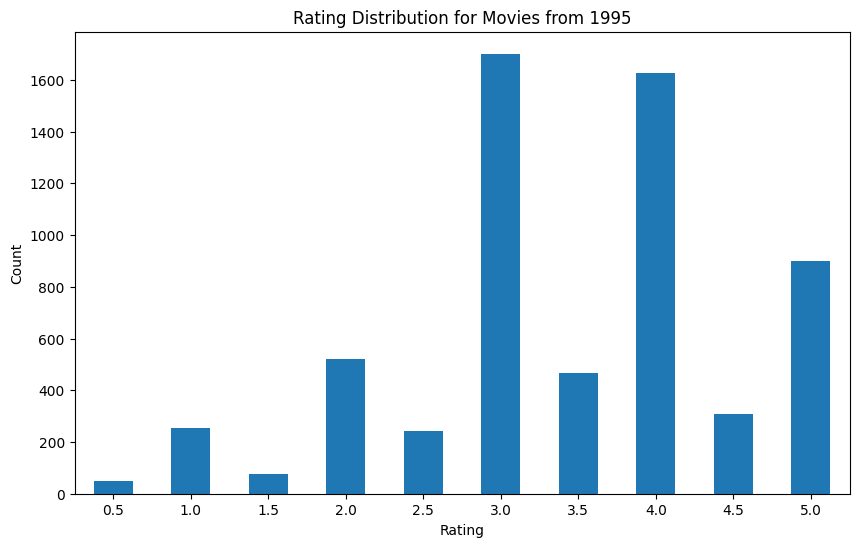

In [ ]:
plt.figure(figsize=(10, 6))
rating_distribution_1995.plot(kind='bar')
plt.title('Rating Distribution for Movies from 1995')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Zad. 3

In [ ]:
action_movies = movies[movies['genres'].str.contains("Action")]
action_movie_ids = action_movies['movieId']
action_ratings = ratings[ratings['movieId'].isin(action_movie_ids)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
avg_action_rating = action_ratings['rating'].mean()
print(f"Średnia ocen wszystkich filmów akcji: {avg_action_rating}")

Średnia ocen wszystkich filmów akcji: 3.447984331646809


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
action_movie_avg_ratings = action_ratings.groupby('movieId')['rating'].mean().reset_index()
top_3_action_movies = action_movie_avg_ratings.nlargest(3, 'rating')
top_3_action_movies = top_3_action_movies.merge(movies[['movieId', 'title']], on='movieId')
print("Top 3 najwyżej oceniane filmy akcji:")
print(top_3_action_movies[['title', 'rating']])

Top 3 najwyżej oceniane filmy akcji:
                                            title  rating
0  Supercop 2 (Project S) (Chao ji ji hua) (1993)     5.0
1                          Assignment, The (1997)     5.0
2                                Knock Off (1998)     5.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Surprise
*   Zbuduj system rekomendacyjny używając biblioteki SURPRISE
*   Użyj dwóch algorytmów SVD oraz kNN w wersji wylosowanej
* Użyj optymalizacji parametrów metodą GRID search do wyboru liczby sąsiadów z wylosowanego przedziału
* Użyj walidacji krzyżowej dla ostatecznego modelu
* Porównaj oba algorytmy pod względem czasu uczenia oraz wylosowanych błędów

In [ ]:
!pip install surprise

import pandas as pd
import time
from surprise.model_selection import cross_validate, GridSearchCV, train_test_split
from surprise.prediction_algorithms import SVD, KNNBasic, KNNBaseline
from surprise import Dataset, Reader, accuracy

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
ratings = pd.read_csv('https://s3-us-west-2.amazonaws.com/recommender-tutorial/ratings.csv')

min_rating = ratings.rating.min()
max_rating = ratings.rating.max()
reader = Reader(rating_scale=(min_rating, max_rating))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=0.25)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
start_time_svd_train = time.time()
algo_svd = SVD()
algo_svd.fit(trainset)
predictions_svd = algo_svd.test(testset)
accuracy.rmse(predictions_svd)
end_time_svd_train = time.time()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RMSE: 0.8717


In [ ]:
param_grid_svd = {'n_factors': [1, 2, 5, 10, 50]}
start_time_svd = time.time()
gs_svd = GridSearchCV(SVD, param_grid_svd, measures=['rmse'], cv=5, n_jobs=-1)
gs_svd.fit(data)
end_time_svd = time.time()

best_svd_params = gs_svd.best_params
best_svd = gs_svd.best_estimator['rmse']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
cv_svd = cross_validate(best_svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8742  0.8645  0.8718  0.8738  0.8640  0.8697  0.0045  
MAE (testset)     0.6724  0.6650  0.6686  0.6722  0.6652  0.6687  0.0032  
Fit time          0.67    0.68    0.69    0.69    0.70    0.69    0.01    
Test time         0.11    0.14    0.26    0.16    0.26    0.19    0.06    


In [ ]:
start_time_knn_train = time.time()
algo_knn = KNNBasic()
algo_knn.fit(trainset)
predictions_knn = algo_knn.test(testset)
accuracy.rmse(predictions_knn)
end_time_knn_train = time.time()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9520


In [ ]:
param_grid_knn = {'k': [1, 2, 5, 10, 20, 30, 40, 50]}
start_time_knn = time.time()
gs_knn = GridSearchCV(KNNBasic, param_grid_knn, measures=['rmse'], cv=5, n_jobs=-1)
gs_knn.fit(data)
end_time_knn = time.time()

best_knn_params = gs_knn.best_params
best_knn = gs_knn.best_estimator['rmse']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
cv_knn = cross_validate(best_knn, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9336  0.9396  0.9398  0.9521  0.9389  0.9408  0.0061  
MAE (testset)     0.7137  0.7141  0.7164  0.7240  0.7172  0.7171  0.0037  
Fit time          0.11    0.15    0.14    0.21    0.19    0.16    0.03    
Test time         1.07    1.08    1.09    1.87    1.51    1.32    0.32    


In [ ]:
algo_knn_baseline = KNNBaseline()
algo_knn_baseline.fit(trainset)
predictions_knn_baseline = algo_knn_baseline.test(testset)
accuracy.rmse(predictions_knn_baseline)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8729


0.8729157189341102

In [ ]:
start_time_knn_cross = time.time()
cv_results_knn = cross_validate(best_knn, data, measures=['rmse'], cv=5, verbose=True)
end_time_knn_cross = time.time()

start_time_svd_cross = time.time()
cv_results_svd = cross_validate(best_svd, data, measures=['rmse'], cv=5, verbose=True)
end_time_svd_cross = time.time()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9413  0.9424  0.9356  0.9410  0.9406  0.9402  0.0024  
Fit time          0.19    0.14    0.14    0.14    0.16    0.15    0.02    
Test time         1.83    1.09    1.10    1.26    1.10    1.28    0.28    
Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8713  0.8651  0.8737  0.8696  0.8687  0.8697  0.0028  
Fit time          0.69    0.69    0.68    0.69    0.88    0.73    0.08    
Test ti

In [ ]:
print(f"\nNajlepszy KNN RMSE: {gs_knn.best_score['rmse']}")
print(f"Najlepszy SVD RMSE: {gs_svd.best_score['rmse']}")
print(f"\nNajlepsze parametry KNN: {gs_knn.best_params['rmse']}")
print(f"Najlepsze parametry SVD: {gs_svd.best_params['rmse']}")
print(f"\nCzas trenowania hiperparametrów KNN: {end_time_knn - start_time_knn} sekund")
print(f"Czas trenowania hiperparametrów SVD: {end_time_svd - start_time_svd} sekund")
print(f"\nCzas trenowania KNN (cross-validation): {end_time_knn_cross - start_time_knn_cross} sekund")
print(f"Czas trenowania SVD (cross-validation): {end_time_svd_cross - start_time_svd_cross} sekund")
print(f"\nCzas trenowania SVD: {end_time_svd_train - start_time_svd_train} sekund")
print(f"Czas trenowania KNN: {end_time_knn_train - start_time_knn_train} sekund")
print(f"\nWyniki walidacji krzyżowej KNN: {cv_results_knn}")
print(f"Wyniki walidacji krzyżowej SVD: {cv_results_svd}")


Najlepszy KNN RMSE: 0.9388405667873967
Najlepszy SVD RMSE: 0.8691078022089982

Najlepsze parametry KNN: {'k': 10}
Najlepsze parametry SVD: {'n_factors': 2}

Czas trenowania hiperparametrów KNN: 47.00746011734009 sekund
Czas trenowania hiperparametrów SVD: 24.026528358459473 sekund

Czas trenowania KNN (cross-validation): 8.389530658721924 sekund
Czas trenowania SVD (cross-validation): 5.509493827819824 sekund

Czas trenowania SVD: 3.30783748626709 sekund
Czas trenowania KNN: 3.3161423206329346 sekund

Wyniki walidacji krzyżowej KNN: {'test_rmse': array([0.94125097, 0.94243947, 0.93562367, 0.94096055, 0.94057081]), 'fit_time': (0.1857137680053711, 0.1430201530456543, 0.1449110507965088, 0.14060735702514648, 0.15836262702941895), 'test_time': (1.8296575546264648, 1.0934474468231201, 1.0964617729187012, 1.2592661380767822, 1.0996840000152588)}
Wyniki walidacji krzyżowej SVD: {'test_rmse': array([0.87127301, 0.8651421 , 0.8736695 , 0.86961414, 0.86873245]), 'fit_time': (0.686345100402832,

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
